In [99]:
import pandas as pd 
import spacy 

df = pd.read_csv("csv.csv")
print(df.shape)
df.head()

(239, 3)


,id,bullying_words,type_bully
0,1000,Hate,bully
1,1001,Insult,bully
2,1002,Threat,bully
3,1003,Mockery,bully
4,1004,Tease,bully


In [100]:
# # Processing data from commentsit being bullying_words
# import spacy  

# nlp = spacy.load("en_core_web_sm")
# # function to preprocess
# def preprocess(bullying_words):
    
#     doc = nlp(bullying_words)
    
#     filtered_tokens = []
    
#     for token in doc:
#         if token.is_stop or token.is_punct:
#             continue
#         # appending new values to the list
#         filtered_tokens.append(token.lemma_)
#     # converting alist to a string
#     return " ".join(filtered_tokens)

# preprocess("You're loved and cherished by those who matter.")

In [101]:
# checking if they balance
df.type_bully.value_counts()

type_bully
bully        158
non-bully     66
non           15
Name: count, dtype: int64

In [102]:
# under sampling taking random sample
min_sample = 50
df_bully = df[df.type_bully == "bully"].sample(min_sample, random_state=40)
df_non_bully = df[df.type_bully == "non-bully"].sample(min_sample, random_state=40)


In [103]:
#it supply bunch of data frames into argument and add them row by row
df_balanced = pd.concat([df_bully, df_non_bully], axis=0)
df_balanced.type_bully.value_counts()

type_bully
bully        50
non-bully    50
Name: count, dtype: int64

In [105]:
# training a model and the column type_bully_num is our target varviable
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=40)
X_train, X_test, Y_train, Y_test = train_test_split(
    df_balanced.bullying_words,
    df_balanced.type_bully_num,
    test_size=0.2,
    random_state=40,
#it create equal number of train and test
    stratify=df_balanced.type_bully_num
)

In [106]:
Y_train.value_counts()

type_bully_num
0    40
1    40
Name: count, dtype: int64

In [107]:
print(X_train.shape)
X_train.head()

(80,)


106                                             Validate
198                                           moshemane 
127    "You're important and valued by those who know...
117                  You're not alone. I'm here for you.
109                                              Empower
Name: bullying_words, dtype: object

In [110]:
# Processing data from commentsit being bullying_words
# Load the spaCy English model
nlp = spacy.load('en_core_web_sm')

# Define the preprocess function to handle NaN values
def preprocess(bullying_words):
    if pd.notnull(bullying_words):  # Check if the value is not NaN
        doc = nlp(bullying_words)
        filtered_tokens = []
        for token in doc:
            if not token.is_stop and not token.is_punct and not token.like_num:
                filtered_tokens.append(token.lemma_)
        return ' '.join(filtered_tokens)
    else:
        return ''  # Return an empty string for NaN values

# Apply the preprocess function to create a new column 'processed_text'
df_balanced['processed_text'] = df_balanced['bullying_words'].apply(preprocess)
# converting into numeric when it maps bully and non-bully
df_balanced['type_bully_num'] = df_balanced.type_bully.map(
    {'bully': 1, 'non-bully': 0
})
# checking it
df_balanced.head()

,id,bullying_words,type_bully,type_bully_num,processed_text
53,1053,moleko,bully,1,moleko
152,1154,malinkoana,bully,1,malinkoana
178,1180,ua ts'abeha,bully,1,ua ts'abeha
10,1010,"You're so dumb, you can't even understand simp...",bully,1,dumb understand simple thing
215,1217,useless,bully,1,useless


In [111]:
# building a NAIVE BAYES MODEL since is good for text base problems /Random Forest/Decision Tree/Gaining
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Create a pipeline with CountVectorizer and MultinomialNB
lejone = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range = (1, 3))),
    ('classifier', MultinomialNB())
])

# Fit the pipeline on the training data
lejone.fit(X_train, Y_train)


Pipeline(steps=[('vectorizer', CountVectorizer(ngram_range=(1, 3))),
                ('classifier', MultinomialNB())])

In [112]:
# Make predictions on the testing data
Y_pred = lejone.predict(X_test)

# Evaluate the model producing a classification report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.59      1.00      0.74        10
           1       1.00      0.30      0.46        10

    accuracy                           0.65        20
   macro avg       0.79      0.65      0.60        20
weighted avg       0.79      0.65      0.60        20



In [113]:

from joblib import dump, load
# Save the model to a file
dump(lejone, 'benji.joblib')
# Load the model
loaded_model = load('benji.joblib')

In [114]:
X_test[:5]

111                                        Comfort
103                                      Encourage
141    "You're a role model for those around you."
210                                   life saviour
232                               tsheliseha naake
Name: bullying_words, dtype: object

In [115]:
Y_test[:5]

111    0
103    0
141    0
210    0
232    0
Name: type_bully_num, dtype: int64

In [116]:
Y_pred[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [117]:
# building a NAIVE BAYES MODEL since is good for text base problems /Random Forest/Decision Tree/Gaining
# pretraining the model with the preprocessed data 

X_train, X_test, Y_train, Y_test = train_test_split(
    df_balanced.processed_text,
    df_balanced.type_bully_num,
    test_size=0.2,
    random_state=40,
#it create equal number of train and test
    stratify=df_balanced.type_bully_num
)
# Create a pipeline with CountVectorizer and MultinomialNB
lejone = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range = (1, 3))),
    ('classifier', MultinomialNB())
])

# Fit the pipeline on the training data
lejone.fit(X_train, Y_train)



Pipeline(steps=[('vectorizer', CountVectorizer(ngram_range=(1, 3))),
                ('classifier', MultinomialNB())])

In [118]:

# Make predictions on the testing data
Y_pred = lejone.predict(X_test)

# Evaluate the model producing a classification report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.56      1.00      0.71        10
           1       1.00      0.20      0.33        10

    accuracy                           0.60        20
   macro avg       0.78      0.60      0.52        20
weighted avg       0.78      0.60      0.52        20



In [119]:
from sklearn import metrics
metrics.accuracy_score(Y_test, Y_pred)*100

60.0

In [120]:
# ploting confusion metrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[10,  0],
       [ 8,  2]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

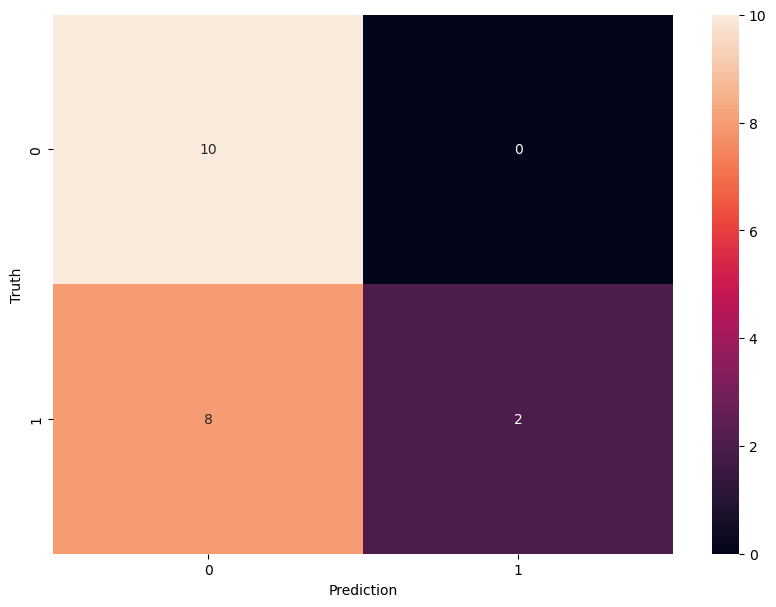

In [121]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')
           

In [122]:
# saving model by dumping it
import pickle
new_file = open('lejone_model.pkl','wb')
pickle.dump(lejone, new_file)
new_file.close()
                